# Chapter 18: Aerospace Engineering: Trajectory Modeling

## Theory: Basics of Flight Dynamics, Drag, Thrust, and Gravity

### Core Concepts
1. **Flight Dynamics**:
   - Study of forces and motions affecting an object in flight.
   - Key components: thrust, drag, lift, and gravity.

2. **Thrust**:
   - Force generated to propel an object forward.
   - Typically provided by engines.

3. **Drag**:
   - Resistance force caused by air opposing the motion of the object.
   - Depends on shape, speed, and air properties.

4. **Gravity**:
   - Downward force acting on the object due to Earth's mass.
   - Affects trajectory and flight time.

5. **Applications**:
   - Modeling projectile motion, rocket launches, and aircraft trajectories.

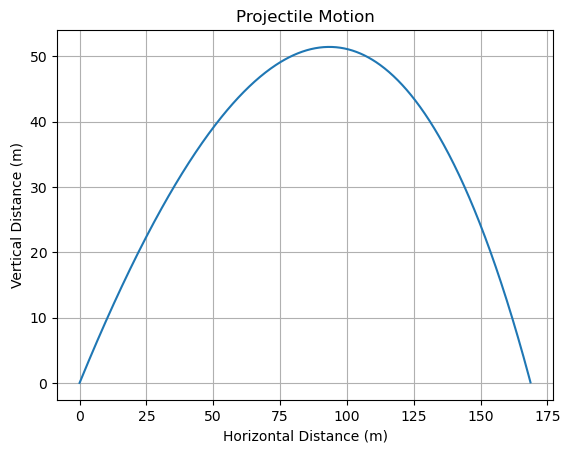

In [1]:
# Example Code: Object-Oriented Simulation of Projectile Motion

import math
import matplotlib.pyplot as plt

class Projectile:
    def __init__(self, mass, initial_velocity, angle, drag_coefficient=0.0):
        self.mass = mass  # in kilograms
        self.velocity = initial_velocity  # in m/s
        self.angle = math.radians(angle)  # convert degrees to radians
        self.drag_coefficient = drag_coefficient  # dimensionless
        self.gravity = 9.81  # acceleration due to gravity in m/s²

    def simulate(self, time_step=0.01, max_time=10):
        x, y = 0, 0  # initial position
        vx = self.velocity * math.cos(self.angle)  # initial horizontal velocity
        vy = self.velocity * math.sin(self.angle)  # initial vertical velocity
        positions = [(x, y)]

        for t in range(int(max_time / time_step)):
            # Calculate drag force
            drag_force = self.drag_coefficient * (vx ** 2 + vy ** 2) ** 0.5
            drag_acceleration = drag_force / self.mass

            # Update velocities
            ax = -drag_acceleration * (vx / (vx ** 2 + vy ** 2) ** 0.5) if vx != 0 else 0
            ay = -self.gravity - (drag_acceleration * (vy / (vx ** 2 + vy ** 2) ** 0.5) if vy != 0 else 0)
            vx += ax * time_step
            vy += ay * time_step

            # Update positions
            x += vx * time_step
            y += vy * time_step

            if y < 0:  # stop when projectile hits the ground
                break
            positions.append((x, y))

        return positions

# Example simulation
projectile = Projectile(mass=1.0, initial_velocity=50, angle=45, drag_coefficient=0.1)
trajectory = projectile.simulate()

# Plot the trajectory
x_vals, y_vals = zip(*trajectory)
plt.plot(x_vals, y_vals)
plt.title("Projectile Motion")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Distance (m)")
plt.grid()
plt.show()

## Knowledge Check: Modify Code to Adjust Conditions for Various Trajectories

### Problem 1
Simulate the trajectory of a projectile with the following conditions:
- Mass = 2 kg
- Initial velocity = 60 m/s
- Launch angle = 30°
- Drag coefficient = 0.05

### Problem 2
Compare the trajectories of projectiles launched at 30°, 45°, and 60° with an initial velocity of 50 m/s. Keep other parameters constant.

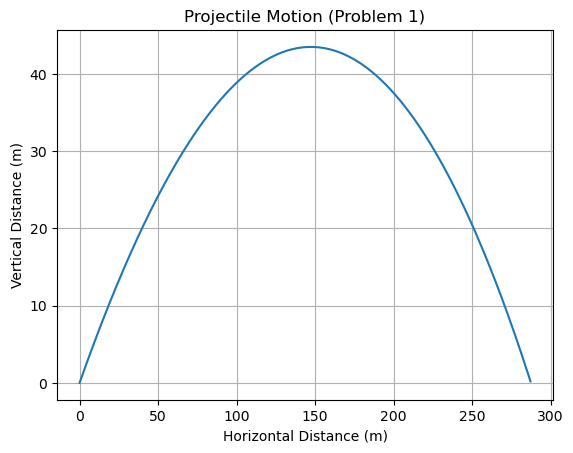

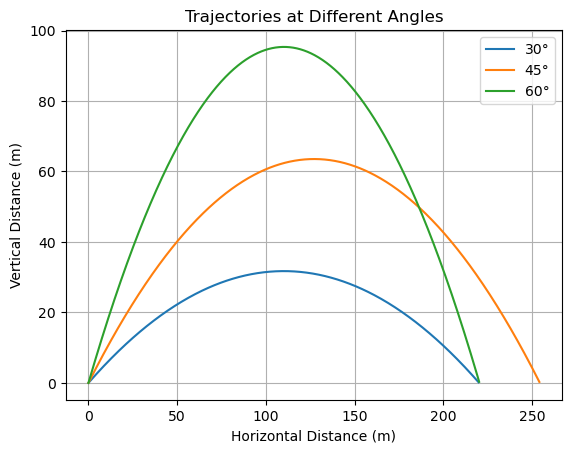

In [3]:
# Problem 1 Solution
projectile = Projectile(mass=2.0, initial_velocity=60, angle=30, drag_coefficient=0.05)
trajectory = projectile.simulate()

# Plot the trajectory
x_vals, y_vals = zip(*trajectory)
plt.plot(x_vals, y_vals)
plt.title("Projectile Motion (Problem 1)")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Distance (m)")
plt.grid()
plt.show()

# Problem 2 Solution
angles = [30, 45, 60]
for angle in angles:
    projectile = Projectile(mass=1.0, initial_velocity=50, angle=angle, drag_coefficient=0.0)
    trajectory = projectile.simulate()
    x_vals, y_vals = zip(*trajectory)
    plt.plot(x_vals, y_vals, label=f"{angle}°")

plt.title("Trajectories at Different Angles")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Distance (m)")
plt.legend()
plt.grid()
plt.show()